In [137]:
import numpy as np
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
from sklearn.feature_extraction.text import TfidfVectorizer

In [138]:
data = pd.read_csv('tweet_emotions.csv')
print(data['content'])

0        @tiffanylue i know  i was listenin to bad habi...
1        Layin n bed with a headache  ughhhh...waitin o...
2                      Funeral ceremony...gloomy friday...
3                     wants to hang out with friends SOON!
4        @dannycastillo We want to trade with someone w...
                               ...                        
39995                                     @JohnLloydTaylor
39996                       Happy Mothers Day  All my love
39997    Happy Mother's Day to all the mommies out ther...
39998    @niariley WASSUP BEAUTIFUL!!! FOLLOW ME!!  PEE...
39999    @mopedronin bullet train from tokyo    the gf ...
Name: content, Length: 40000, dtype: object


In [139]:
data.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [140]:
def data_processing(content):
    content = content.lower()
    content = re.sub(r"https\S+|www\S+http\S+",'', content, flags=re.MULTILINE)
    content = re.sub(r'\@w+|\#','', content)
    content = re.sub(r'[^\w\s]','', content)
    content_token = word_tokenize(content)
    filtered_content = [w for w in content_token if not w in stop_words]
    return " ".join(filtered_content)

In [141]:
data.content = data['content'].apply(data_processing)

In [142]:
print(data['content'])

0        tiffanylue know listenin bad habit earlier sta...
1                   layin n bed headache ughhhhwaitin call
2                            funeral ceremonygloomy friday
3                                  wants hang friends soon
4        dannycastillo want trade someone houston ticke...
                               ...                        
39995                                      johnlloydtaylor
39996                               happy mothers day love
39997    happy mothers day mommies woman man long youre...
39998    niariley wassup beautiful follow peep new hit ...
39999    mopedronin bullet train tokyo gf visiting japa...
Name: content, Length: 40000, dtype: object


In [143]:
stemmer = PorterStemmer()
def stemming(data):
    content = [stemmer.stem(word) for word in data]
    return data

In [144]:
data['content'] = data['content'].apply(lambda x: stemming(x))

<AxesSubplot: xlabel='sentiment', ylabel='count'>

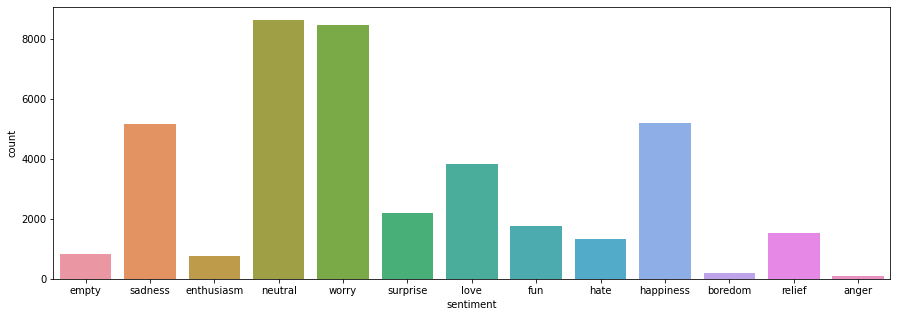

In [145]:
fig = plt.figure(figsize=(15, 5))
sns.countplot(x='sentiment', data = data)

In [146]:
vect = TfidfVectorizer(ngram_range=(1,2)).fit(data['content'])
feature_names = vect.get_feature_names_out()
print(feature_names[:100])

['00' '00 graduated' '000' '000 dunno' '000 httpplurkcompwxj54' '0003'
 '0003 im' '002' '006' '006 totally' '01' '01 final' '01 girls' '01 mm'
 '010' '010 050' '0128' '0128 morning' '01theone' '01theone looking' '02'
 '02 give' '023' '024' '024 wire' '0255' '03' '03 glad' '03 scoreless'
 '04' '04 would' '0405' '0405 good' '04182012154' '04182012154 send'
 '0430' '0430 alarm' '05' '05 auto' '050' '050 slowly' '050809'
 '050809 httpbitlyhclxp' '0530' '0530 first' '0531' '0531 marks' '06'
 '06 20' '06 loved' '06 one' '06 uncle' '0600' '0600 went' '062709' '0630'
 '0630 work' '07' '07 bloody' '07 seconds' '07 wanted' '079ï½'
 '079ï½ cool' '07i' '07i think' '08' '08 happens' '08 shes' '08 still'
 '08 tjefferson' '08 troosevelt' '080509' '080509 partying' '080809' '09'
 '09 10gb' '09 356pm' '09 mediation' '09 still' '09 though' '09 today'
 '0909' '0909 full' '0930' '0930 range' '09casper' '09casper oooooo' '0_o'
 '0f' '0f lt3' '0kenjoy' '0kenjoy dora' '0n' '0n m3' '0omiriamo0'
 '0omiriamo0 l

In [147]:
sentiment_change = data.astype('category')
sentiment_change.dtypes
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for sentiment in sentiment_change.columns:
    sentiment_change['sentiment'] = labelencoder.fit_transform(sentiment_change['sentiment'])

# print(sentiment_change['sentiment'])
sentiment_change.head()

,tweet_id,sentiment,content
0,1956967341,2,tiffanylue know listenin bad habit earlier sta...
1,1956967666,10,layin n bed headache ughhhhwaitin call
2,1956967696,10,funeral ceremonygloomy friday
3,1956967789,3,wants hang friends soon
4,1956968416,8,dannycastillo want trade someone houston ticke...


In [148]:
X = sentiment_change['content']
y = sentiment_change['sentiment']
X = vect.transform(X)

In [149]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [150]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=6, random_state=1)

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
print(y_pred[0:5])

[8 8 8 8 8]


In [151]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = dt.predict(X_test)

acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.27


In [152]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00       145
           3       0.00      0.00      0.00       159
           4       0.00      0.00      0.00       369
           5       0.35      0.04      0.08       978
           6       0.47      0.16      0.24       252
           7       0.54      0.29      0.38       803
           8       0.24      0.95      0.38      1749
           9       0.00      0.00      0.00       310
          10       0.42      0.11      0.18      1074
          11       0.00      0.00      0.00       423
          12       0.41      0.03      0.06      1675

    accuracy                           0.27      8000
   macro avg       0.19      0.12      0.10      8000
weighted avg       0.31      0.27      0.17      8000



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.